In [1]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
from jira import JIRA
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [2]:
jira = JIRA('https://jira.sonarsource.com/')

In [99]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures"

In [4]:
issue_fields = ['issuetype',
 'customfield_12130',
 'customfield_11041',
 'customfield_12132',
 'customfield_12131',
 'project',
 'customfield_12134',
 'customfield_12530',
 'fixVersions',
 'customfield_12133',
 'customfield_12136',
 'customfield_12532',
 'resolution',
 'customfield_10431',
 'customfield_12135',
 'customfield_12531',
 'customfield_12138',
 'customfield_10432',
 'customfield_12534',
 'customfield_12137',
 'customfield_10433',
 'customfield_12533',
 'customfield_11832',
 'customfield_11831',
 'customfield_11833',
 'resolutiondate',
 'workratio',
 'lastViewed',
 'watches',
 'created',
 'customfield_11032',
 'customfield_11033',
 'priority',
 'customfield_11630',
 'customfield_11233',
 'customfield_11036',
 'customfield_11830',
 'labels',
 'customfield_11631',
 'customfield_11038',
 'customfield_10930',
 'customfield_11347',
 'customfield_10931',
 'customfield_10932',
 'versions',
 'issuelinks',
 'assignee',
 'updated',
 'status',
 'components',
 'customfield_12031',
 'customfield_11140',
 'customfield_12030',
 'customfield_12033',
 'customfield_11141',
 'description',
 'customfield_12032',
 'customfield_12034',
 'customfield_12430',
 'customfield_11344',
 'customfield_11343',
 'customfield_10530',
 'customfield_11345',
 'customfield_10730',
 'customfield_11337',
 'customfield_11930',
 'customfield_11139',
 'customfield_11338',
 'summary',
 'creator',
 'subtasks',
 'customfield_11130',
 'customfield_11131',
 'reporter',
 'customfield_11132',
 'customfield_11133',
 'customfield_10243',
 'customfield_11335',
 'customfield_11334',
 'customfield_11730',
 'customfield_10434',
 'customfield_12536',
 'customfield_12535',
 'customfield_12139',
 'environment',
 'customfield_12538',
 'customfield_10437',
 'customfield_12537',
 'customfield_10438',
 'duedate',
 'votes',
 #'__module__',
 #'__dict__',
 #'__weakref__',
 #'__doc__'
       ]

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

Issues are retrieved and proccesed here given that pickle cannot serialize issues.
Therefore they need to be processed into a dataframe to be saved as csv

In [5]:
#download all issues
size = 100
initial = 0
issue_tuples = []
all_issues = []
while True:
    start= initial*size
    issues = jira.search_issues('project=SONAR',  start, size)
    all_issues = all_issues + issues
    if len(issues) == 0:
        break
    initial += 1
    if(initial % 10 == 0):
        print(f"Issues downloaded: {len(all_issues)}")

Issues downloaded: 1000
Issues downloaded: 2000
Issues downloaded: 3000
Issues downloaded: 4000
Issues downloaded: 5000
Issues downloaded: 6000
Issues downloaded: 7000
Issues downloaded: 8000
Issues downloaded: 9000
Issues downloaded: 10000
Issues downloaded: 11000


In [56]:
pp.pprint(all_issues[1780].__dict__)

{'_base_url': '{server}/rest/{rest_path}/{rest_api_version}/{path}',
 '_options': {'agile_rest_api_version': '1.0',
              'agile_rest_path': 'greenhopper',
              'async': False,
              'async_workers': 5,
              'auth_url': '/rest/auth/1/session',
              'check_update': False,
              'client_cert': None,
              'context_path': '/',
              'headers': {'Cache-Control': 'no-cache',
                          'Content-Type': 'application/json',
                          'X-Atlassian-Token': 'no-check'},
              'resilient': True,
              'rest_api_version': '2',
              'rest_path': 'api',
              'server': 'https://jira.sonarsource.com',
              'verify': True},
 '_resource': 'issue/{0}',
 '_session': <jira.resilientsession.ResilientSession object at 0x10f1231c0>,
 'expand': 'operations,versionedRepresentations,editmeta,changelog,renderedFields',
 'fields': <class 'jira.resources.PropertyHolder'>,
 'id'

In [66]:
issue_tuples = []
#create tuples for dataframe creation
for issue in all_issues:
    values = []
    values.append(issue.key)
    values.append(issue.id)
    for field in issue_fields:
        values.append(getattr(issue.fields, field))
    issue_tuples.append(values)

In [69]:
issues_df = pd.DataFrame(issue_tuples, columns=(["issue_key", "issue_id"] + issue_fields))
issues_df

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,customfield_11630,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes
0,SONAR-14169,99621,Sub-task,P3-Medium,0|i0duyn:,No root cause identified,None,SONAR,Not captured yet,None,[],Not assessed yet,Not captured yet,None,None,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,None,-1,None,<JIRA Watchers at 5036846000>,2020-11-19T15:56:32.000+0100,None,None,Major,Developer,None,None,None,[],None,None,None,None,None,None,[],[],Michal Duda,2020-11-19T15:59:24.000+0100,In Progress,[],None,None,None,None,None,"Due to backward compatiblity, we'll have to ke...",None,SonarQube,None,None,None,None,None,None,None,{},None,None,Adapt WS to export XML definition,Michal Duda,[],None,None,Duarte Meneses,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],2020-11-26,0
1,SONAR-14168,99609,Sub-task,P3-Medium,0|i0duvz:,No root cause identified,None,SONAR,Not captured yet,None,[],Not assessed yet,Not captured yet,None,Fixed,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,2020-11-19T15:02:04.000+0100,-1,None,<JIRA Watchers at 5037154944>,2020-11-19T12:10:36.000+0100,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[],Jeremy Davis,2020-11-19T15:02:04.000+0100,Resolved,[],None,None,None,None,None,None,None,SonarQube,None,None,None,None,None,None,None,{},None,None,[UI] Realign projects' API,Jeremy Davis,[],None,None,Jeremy Davis,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],2020-11-26,0
2,SONAR-14167,99607,Documentation,P3-Medium,0|i0duvj:,No root cause identified,None,SONAR,Not captured yet,None,[8.6],Not assessed yet,Not captured yet,None,None,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,None,-1,None,<JIRA Watchers at 5037155760>,2020-11-19T10:46:02.000+0100,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[55366],Mike Birnstiehl,2020-11-19T10:46:47.000+0100,Open,[Documentation],None,None,None,None,None,* Add insights on how to quickly analyze a pro...,None,SonarQube,None,None,None,None,None,None,None,{},None,None,Improve the Azure DevOps integration page,Philippe Perrin,[],None,None,Philippe Perrin,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],None,0
3,SONAR-14166,99584,Task,P3-Medium,0|i0duqf:,No root cause identified,None,SONAR,Not captured yet,None,[8.6],Not assessed yet,Not captured yet,None,None,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,None,-1,None,<JIRA Watchers at 5037157008>,2020-11-18T14:24:

In [70]:
def extract_features(df, field, fields_to_extract):
    for fte in fields_to_extract:
        df[f"{field}_{fte}"] = issues_df[field].apply(lambda x: getattr(x,fte) if x else None)
    return df

#### Extract features

In [71]:
extract_features(issues_df, "issuetype", ["id", "name"])
extract_features(issues_df, "priority", ["id", "name"])
extract_features(issues_df, "assignee", ["key", "name"])
extract_features(issues_df, "reporter", ["key", "name"])
extract_features(issues_df, "creator", ["key", "name"])
extract_features(issues_df, "status", ["id", "name"])
extract_features(issues_df, "resolution", ["id", "name"])
extract_features(issues_df, "votes", ["votes"])

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,customfield_11630,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-14169,99621,Sub-task,P3-Medium,0|i0duyn:,No root cause identified,None,SONAR,Not captured yet,None,[],Not assessed yet,Not captured yet,None,None,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,None,-1,None,<JIRA Watchers at 5036846000>,2020-11-19T15:56:32.000+0100,None,None,Major,Developer,None,None,None,[],None,None,None,None,None,None,[],[],Michal Duda,2020-11-19T15:59:24.000+0100,In Progress,[],None,None,None,None,None,"Due to backward compatiblity, we'll have to ke...",None,SonarQube,None,None,None,None,None,None,None,{},None,None,Adapt WS to export XML definition,Michal Duda,[],None,None,Duarte Meneses,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],2020-11-26,0,5,Sub-task,3,Major,michal.duda,michal.duda,duarte.meneses,duarte.meneses,michal.duda,michal.duda,3,In Progress,None,None,0
1,SONAR-14168,99609,Sub-task,P3-Medium,0|i0duvz:,No root cause identified,None,SONAR,Not captured yet,None,[],Not assessed yet,Not captured yet,None,Fixed,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,2020-11-19T15:02:04.000+0100,-1,None,<JIRA Watchers at 5037154944>,2020-11-19T12:10:36.000+0100,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[],Jeremy Davis,2020-11-19T15:02:04.000+0100,Resolved,[],None,None,None,None,None,None,None,SonarQube,None,None,None,None,None,None,None,{},None,None,[UI] Realign projects' API,Jeremy Davis,[],None,None,Jeremy Davis,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],2020-11-26,0,5,Sub-task,3,Major,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,5,Resolved,1,Fixed,0
2,SONAR-14167,99607,Documentation,P3-Medium,0|i0duvj:,No root cause identified,None,SONAR,Not captured yet,None,[8.6],Not assessed yet,Not captured yet,None,None,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,None,-1,None,<JIRA Watchers at 5037155760>,2020-11-19T10:46:02.000+0100,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[55366],Mike Birnstiehl,2020-11-19T10:46:47.000+0100,Open,[Documentation],None,None,None,None,None,* Add insights on how to quickly analyze a pro...,None,SonarQube,None,None,None,None,None,None,None,{},None,None,Improve the Azure DevOps integr

#### Type of columns

In [72]:
issues_df["issue_id"] = pd.to_numeric(issues_df.issue_id)
issues_df['created'] = pd.to_datetime(issues_df['created'],errors='coerce', utc=True)
issues_df['resolutiondate'] = pd.to_datetime(issues_df['resolutiondate'],errors='coerce', utc=True)
issues_df['updated'] = pd.to_datetime(issues_df['updated'],errors='coerce', utc=True)
issues_df['duedate'] = pd.to_datetime(issues_df['duedate'],errors='coerce', utc=True)

**How many customfields?**

In [73]:
len([col for col in issues_df.columns if "customfield" in col])

66

#### Rename columns

In [74]:
issues_df = issues_df.rename(columns={"customfield_11630": "edition"})

In [75]:
issues_df.to_csv(f"{csv_folder}/issues.csv")
issues_df = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
issues_df

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-14169,99621,Sub-task,P3-Medium,0|i0duyn:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5036846000>,2020-11-19 14:56:32+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Michal Duda,2020-11-19 14:59:24+00:00,In Progress,[],NaN,NaN,NaN,NaN,NaN,"Due to backward compatiblity, we'll have to ke...",NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Adapt WS to export XML definition,Michal Duda,[],NaN,NaN,Duarte Meneses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-11-26 00:00:00+00:00,0,5,Sub-task,3,Major,michal.duda,michal.duda,duarte.meneses,duarte.meneses,michal.duda,michal.duda,3,In Progress,NaN,NaN,0
1,SONAR-14168,99609,Sub-task,P3-Medium,0|i0duvz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-11-19 14:02:04+00:00,-1,NaN,<JIRA Watchers at 5037154944>,2020-11-19 11:10:36+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-11-19 14:02:04+00:00,Resolved,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,[UI] Realign projects' API,Jeremy Davis,[],NaN,NaN,Jeremy Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-11-26 00:00:00+00:00,0,5,Sub-task,3,Major,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,5,Resolved,1.0,Fixed,0
2,SONAR-14167,99607,Documentation,P3-Medium,0|i0duvj:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.6', id='16435'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5037155760>,2020-11-19 09:46:02+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='55366'>],Mike Birnstiehl,2020-11-19 09:46:47+00:00,Open,"[<JIRA Component: name='Documentation', id='11...",NaN,NaN,NaN,NaN,NaN,* Add insights on how to quickly analyze a pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Improve the Azure DevOps integration page,Philippe Perrin,[],NaN,NaN,Philippe Perri

### Extract components

In [76]:
def extract_components(all_issues, version_field, prefix):
    values = []
    for issue in all_issues:
        for version in getattr(issue.fields, version_field):
            values.append((issue.id,version.name,version.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_name", f"{prefix}_id"])

In [77]:
issues_components = extract_components(all_issues, "components", "component")
issues_components.to_csv(f"{csv_folder}/issues_components.csv")
issues_components = pd.read_csv(f"{csv_folder}/issues_components.csv", index_col=0)
issues_components

,issue_id,component_name,component_id
0,99607,Documentation,11067
1,99569,Authentication & Authorization,11086
2,99563,Web API,11100
3,99554,Web API,11100
4,99553,Issues,11096
...,...,...,...
12016,32247,Measures,11112
12017,32247,Web,11366
12018,29870,Component Viewer,11113
12019,29870,Web,11366


### Extract versions

In [78]:
def extract_versions(all_issues, version_field, prefix):
    values = []
    for issue in all_issues:
        for version in getattr(issue.fields, version_field):
            values.append((issue.id, version.name, version.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_name", f"{prefix}_id"])

In [79]:
issues_fixversions = extract_versions(all_issues, "fixVersions", "fixVersion")
issues_fixversions.to_csv(f"{csv_folder}/issues_fixversions.csv")
issues_fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
issues_fixversions

,issue_id,fixVersion_name,fixVersion_id
0,99607,8.6,16435
1,99584,8.6,16435
2,99583,8.6,16435
3,99582,8.6,16435
4,99581,8.6,16435
...,...,...,...
8623,30985,1.1,11537
8624,29449,1.1,11537
8625,32314,1.1,11537
8626,29663,1.1,11537


In [80]:
issues_versions = extract_versions(all_issues, "versions", "version")
issues_versions.to_csv(f"{csv_folder}/issues_versions.csv")
issues_versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
issues_versions

,issue_id,version_name,version_id
0,99500,8.5,16342
1,99361,8.5,16342
2,99004,8.5.1,16458
3,98951,8.4,15833
4,98652,8.1,15243
...,...,...,...
3346,29492,1.0.2,11536
3347,29496,1.0.2,11536
3348,29480,1.1,11537
3349,29473,1.5,11545


### Extract labels

In [81]:
def extract_labels(all_issues, field, column):
    values = []
    for issue in all_issues:
        for value in getattr(issue.fields, field):
            values.append((issue.id, value))
    return pd.DataFrame(values, columns=["issue_id", column])

In [82]:
issues_labels = extract_labels(all_issues, "labels", "label")
issues_labels.to_csv(f"{csv_folder}/issues_labels.csv")
issues_labels = pd.read_csv(f"{csv_folder}/issues_labels.csv", index_col=0)
issues_labels

,issue_id,label
0,99584,analyzer-upgrade
1,99583,analyzer-upgrade
2,99582,analyzer-upgrade
3,99581,analyzer-upgrade
4,99554,Events
...,...,...
3014,31244,tendency
3015,27938,treemap
3016,27963,drilldown
3017,28399,drilldown


### Extract subtasks

In [83]:
def extract_subtasks(all_issues, field, prefix):
    values = []
    for issue in all_issues:
        for subtask in getattr(issue.fields, field):
            values.append((issue.id,subtask.key,subtask.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_key", f"{prefix}_id"])

In [84]:
issues_substaks = extract_subtasks(all_issues, "subtasks", "subtask")
issues_substaks.to_csv(f"{csv_folder}/issues_subtasks.csv")
issues_substaks = pd.read_csv(f"{csv_folder}/issues_subtasks.csv", index_col=0)
issues_substaks

,issue_id,subtask_key,subtask_id
0,99379,SONAR-14134,99380
1,99379,SONAR-14135,99382
2,99379,SONAR-14136,99383
3,99379,SONAR-14137,99384
4,98843,SONAR-14098,99040
...,...,...,...
879,30992,SONAR-2589,30847
880,30992,SONAR-2590,28458
881,30992,SONAR-2591,30079
882,30992,SONAR-2592,31904


### Edition

In [105]:
edition = issues_df.edition.replace(" ", "Empty value").fillna("Empty value")
edition.value_counts(normalize=True)

Empty value    0.786399
Community      0.173909
Developer      0.021300
Enterprise     0.016852
Data Center    0.001540
Name: edition, dtype: float64

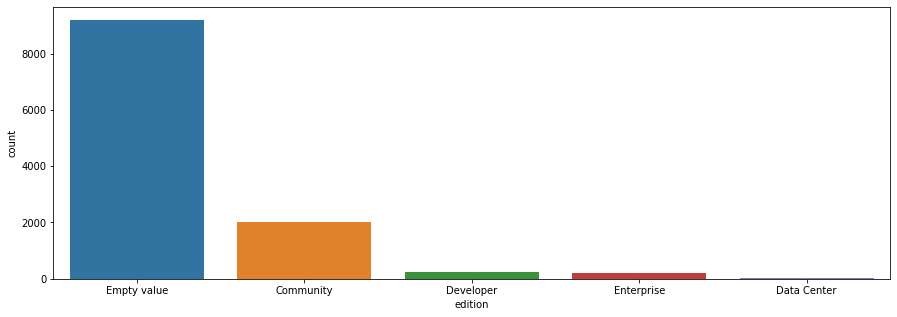

In [120]:
plt.figure()
ax = sns.countplot(x=edition, order=edition.value_counts().sort_values(ascending=False).index)
plt.savefig(f"{figure_folder}/issues/edition_dist.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Filtering only Community ones

In [140]:
# from data_retrivers/issues_community_from_git.py
community_from_git = pd.read_csv(f"{csv_folder}/community_issues_from_git.csv", index_col=0)

In [91]:
ids = list(map(lambda x: x[0], issues_comm))

In [143]:
issues_community = issues_df[(issues_df.edition=="Community") | (issues_df.issue_id.isin(community_from_git.issue_id))]

In [146]:
issues_community[issues_community.edition.isna()]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
959,SONAR-12589,89418,Improvement,NaN,0|i0c8nb:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='8.1', id='15243'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-13 16:42:09+00:00,-1,NaN,<JIRA Watchers at 5066800672>,2019-10-15 10:05:13+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2019-12-13 16:42:11+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,* SonarSecurity 8.1 made of *{color:#ff0000}5 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Upgrade SonarSecurity to 8.1,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2019-12-20 00:00:00+00:00,0,4,Improvement,3,Major,julien.lancelot,julien.lancelot,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,6,Closed,1.0,Fixed,0
1478,SONAR-11849,83009,Improvement,NaN,0|i0b60v:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.8', id='14939'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-17 09:04:18+00:00,-1,NaN,<JIRA Watchers at 5081837184>,2019-03-20 15:34:19+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2019-06-17 09:08:39+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,h3. Community+ Edition:\n\nSonarPHP 3.1.1.4762...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Upgrade code analyzers to latest released vers...,Benoit Gianinetti,[],NaN,NaN,Benoit Gianinetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2019-06-20 00:00:00+00:00,0,4,Improvement,3,Major,julien.lancelot,julien.lancelot,benoit.gianinetti,benoit.gianinetti,benoit.gianinetti,benoit.gianinetti,6,Closed,1.0,Fixed,0
1722,SONAR-11535,79311,Improvement,NaN,0|i0ak6f:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.6', id='14753'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-29 14:22:27+00:00,-1,NaN,<JIRA Watchers at 5090283920>,2018-11-27 14:27:59+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='41649'>],Janos Gyerik,2018-12-17 16:42:57+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,Currently the counts in the summary (try to) e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Show issue counts in summary of Checks matchin...,Janos Gyerik,[],NaN,NaN,Janos Gyerik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-12-05 00:00:00+00:00,0,4,Improvement,3,Major,janos.gyerik,janos.gyerik,janos

In [147]:
issues_community.to_csv(f"{csv_folder}/issues_community.csv")

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

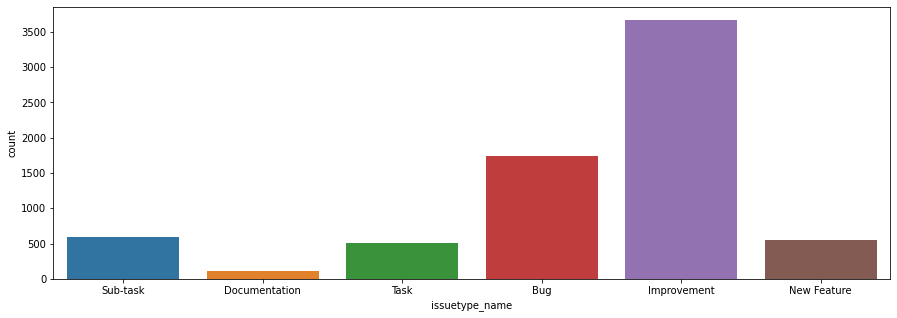

In [148]:
sns.countplot(issues_community.issuetype_name)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

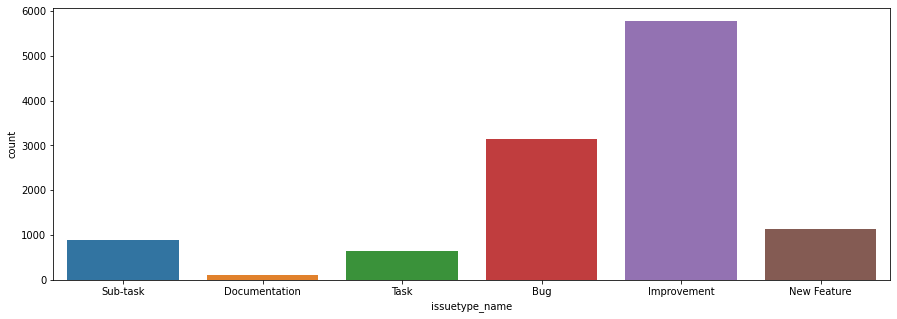

In [151]:
sns.countplot(issues_df.issuetype_name)

In [152]:
issues_df = issues_community

## Field analysis

### Workratio

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='workratio', ylabel='Density'>

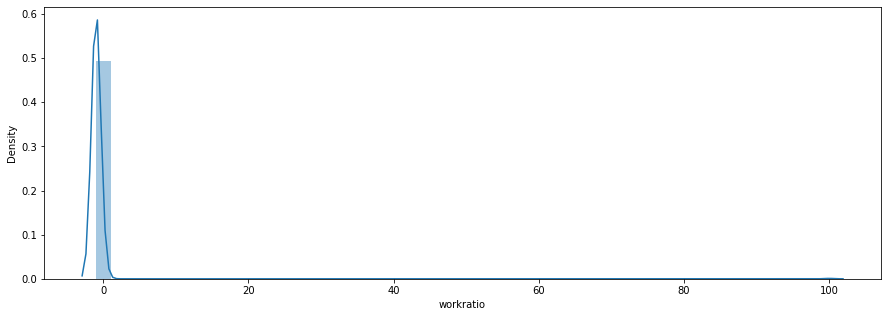

In [153]:
sns.distplot(issues_df.workratio)

<AxesSubplot:xlabel='workratio', ylabel='issue_id'>

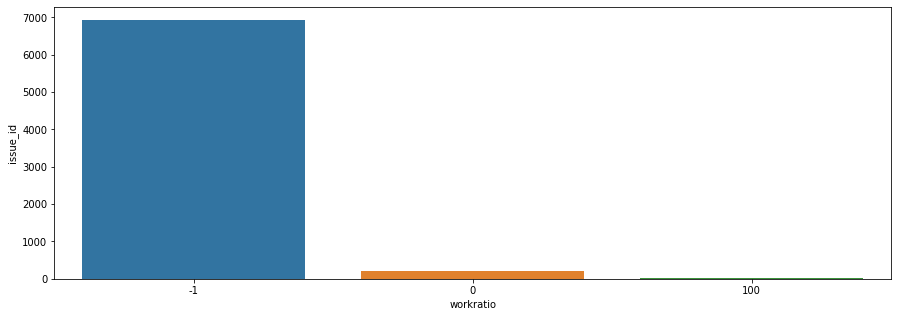

In [154]:
sns.barplot(x="workratio", y="issue_id", data=issues_df.groupby("workratio").count().reset_index())

### IssueType

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

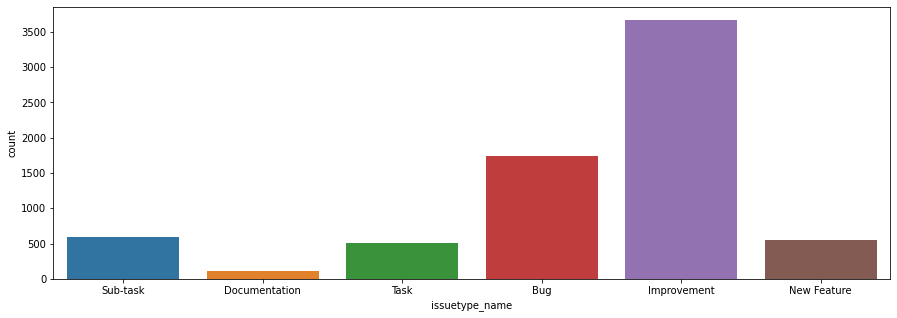

In [155]:
sns.countplot(x="issuetype_name", data=issues_df[["issue_id", "issuetype_name"]])

### Resolution

In [156]:
issues_df.resolution_name.unique()

array(['Fixed', nan, 'Canceled', 'Done', 'Duplicate', "Won't Do",
       "Won't Fix", 'Not an issue', 'Cannot Reproduce', 'Moved To GitHub',
       'Not A Bug', 'Incomplete', 'UNRESOLVED'], dtype=object)

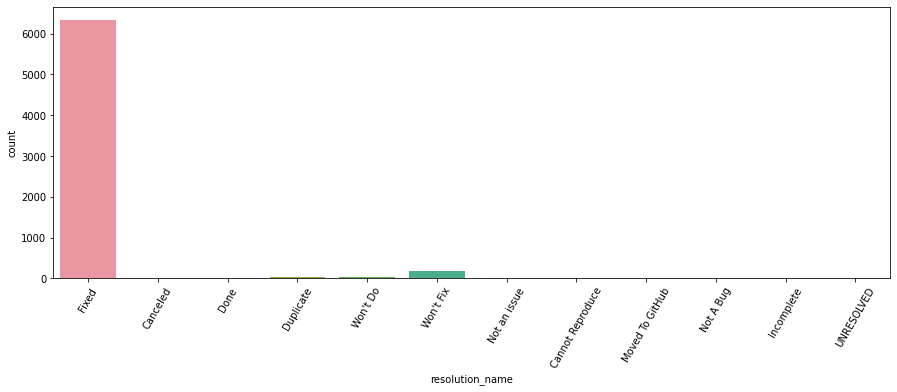

In [157]:
ax = sns.countplot(x="resolution_name", data=issues_df[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

### Priority

In [159]:
issues_df.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Critical', 'Blocker'], dtype=object)

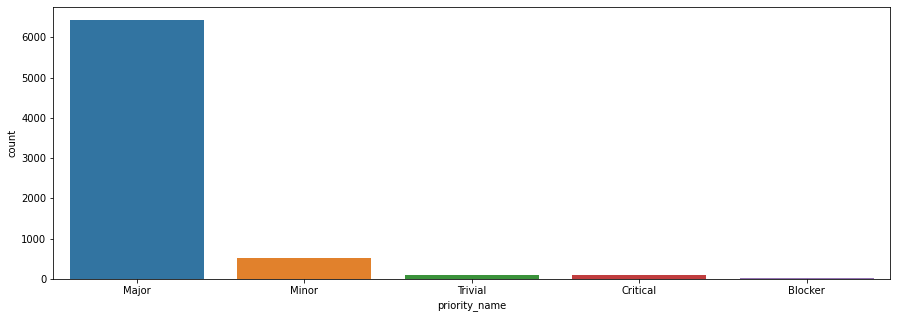

In [160]:
ax = sns.countplot(x="priority_name", data=issues_df[["issue_id", "priority_name"]])

### Labels

In [161]:
len(issues_labels.label.unique())

210

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

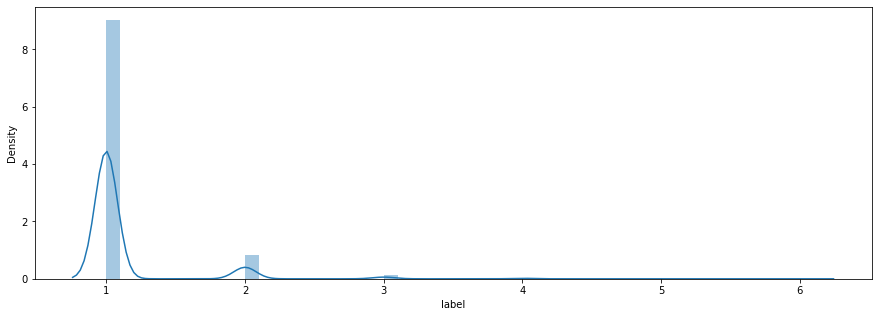

In [162]:
sns.distplot(issues_labels.groupby("issue_id").count().label)

### Versions

In [163]:
len(issues_versions.version_name.unique())

145

In [164]:
top_versions = issues_versions.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)
top_versions = top_versions[top_versions.version_name > "4.5.5"]

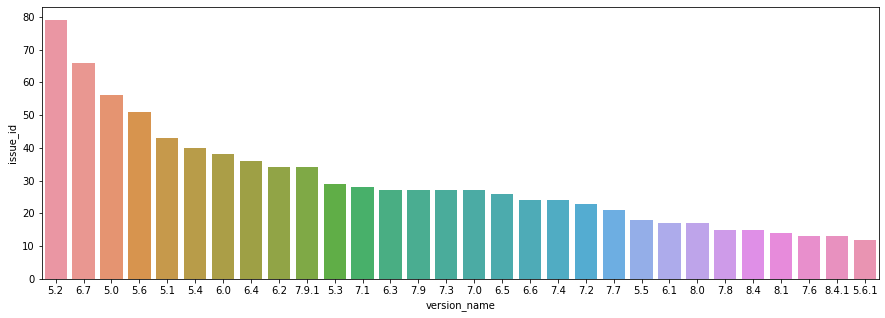

In [165]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(30))

In [166]:
top_versions.head(10).version_name.values

array(['5.2', '6.7', '5.0', '5.6', '5.1', '5.4', '6.0', '6.4', '6.2',
       '7.9.1'], dtype=object)

In [167]:
versions_sorted = issues_versions.sort_values(by="version_name").version_name.unique()

NameError: name 'version_merged' is not defined

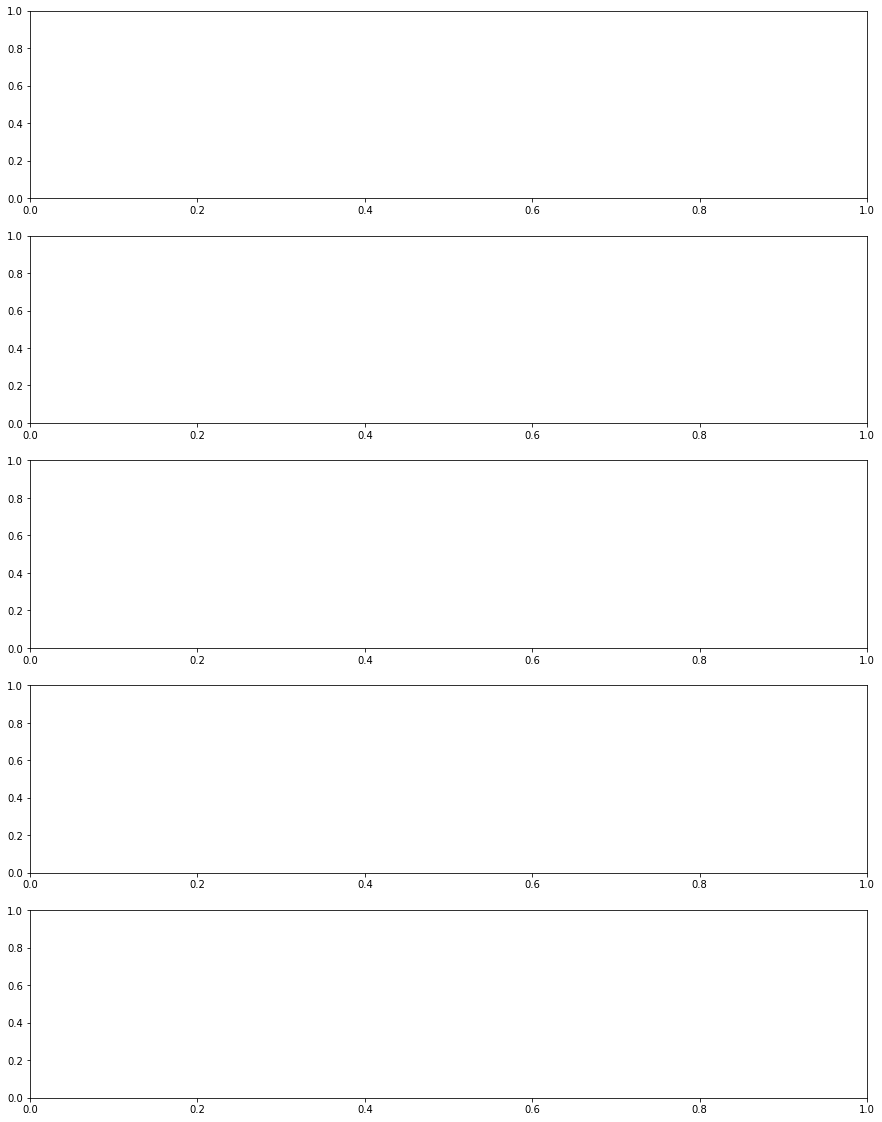

In [168]:
f, axes = plt.subplots(5,1, figsize=(15,20), sharey=True)
for i in range(5):
    data = version_merged[version_merged.version_name.isin(versions_sorted[30*i:30*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [48]:
no_version_issues = issues_df[~issues_df.issue_id.isin(version_merged.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-15 12:37:57+00:00,-1,NaN,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,[<JIRA Component: name='Portfolio & Applicatio...,NaN,NaN,NaN,NaN,NaN,When using {{api/views/add_sub_view}} with a d...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,It should not be possible to use a description...,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaN,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1.0,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-18 09:41:58+00:00,-1,NaN,<JIRA Watchers at 5064045088>,2020-09-08 07:52:57+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-18 09:41:58+00:00,Closed,"[<JIRA Component: name='Security Hotspots', id...",NaN,NaN,NaN,NaN,NaN,Facet `Security Review` is not working while c...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Projects page - Security Review facet on new c...,Jacek Poreda,[],NaN,NaN,Jacek Poreda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-21 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1.0,Fixed,0
46,SONAR-13854,97337,Bug,P3-Medium,0|i0dh3z:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5061507392>,2020-09-04 22:18:18+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-04 22:20:07+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,All plugins extending a base plugin share the ...,NaN,SonarQube,NaN,NaN,Na

In [49]:
bug_no_version[bug_no_version.status_name == "Resolved"][["summary", "description", "status_name", "resolution_name", "resolutiondate","issue_id", "issue_key"]]

,summary,description,status_name,resolution_name,resolutiondate,issue_id,issue_key
148,Maintainability Rating and Technical debt rati...,When updating an issue of type code smells on ...,Resolved,Fixed,2020-07-31 09:30:23+00:00,96361,SONAR-13694
250,Background task reload doesn't update as expected,In the background tasks page:\r\n\r\nPress the...,Resolved,Fixed,2020-08-14 13:47:18+00:00,94999,SONAR-13507


In [50]:
bug_no_version[bug_no_version.resolution_name == "Fixed"]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-15 12:37:57+00:00,-1,NaN,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,[<JIRA Component: name='Portfolio & Applicatio...,NaN,NaN,NaN,NaN,NaN,When using {{api/views/add_sub_view}} with a d...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,It should not be possible to use a description...,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaN,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1.0,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-18 09:41:58+00:00,-1,NaN,<JIRA Watchers at 5064045088>,2020-09-08 07:52:57+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-18 09:41:58+00:00,Closed,"[<JIRA Component: name='Security Hotspots', id...",NaN,NaN,NaN,NaN,NaN,Facet `Security Review` is not working while c...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Projects page - Security Review facet on new c...,Jacek Poreda,[],NaN,NaN,Jacek Poreda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-21 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1.0,Fixed,0
52,SONAR-13847,97230,Bug,P3-Medium,0|i0dgg7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-04 13:22:54+00:00,-1,NaN,<JIRA Watchers at 5061637168>,2020-09-02 15:59:37+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-04 13:22:54+00:00,Closed,"[<JIRA Component: nam

### Status

In [51]:
issues_df.status.unique()

array(['Open', 'In Review', 'In Progress', 'Closed', 'To Do', 'Resolved',
       'Reopened'], dtype=object)

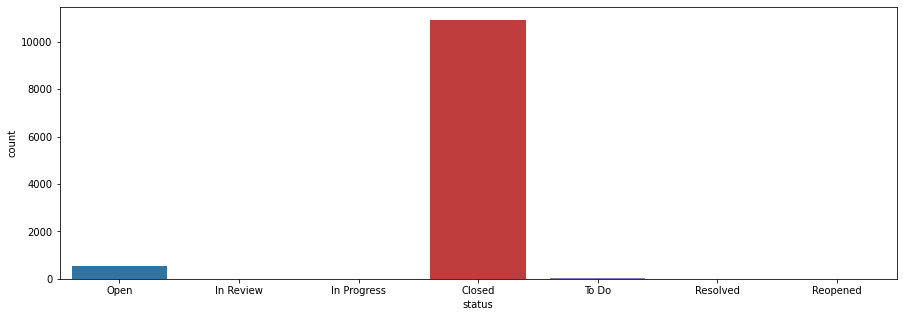

In [52]:
ax = sns.countplot(x="status", data=issues_df[["issue_id", "status"]])

In [54]:
issues_df.edition.describe()

count          2341
unique            5
top       Community
freq           1889
Name: edition, dtype: object

In [55]:
issues_df.edition.isna().sum()

9166

In [56]:
issues_df[(issues_df.edition.isna()) & (issues_df.resolution=="Fixed") & (issues_df.issuetype_name=="Bug")]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
1537,SONAR-11537,79313,Bug,NaN,0|i0ak6v:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.6', id='14753'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 17:05:12+00:00,-1,NaN,<JIRA Watchers at 4948864592>,2018-11-27 14:36:47+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='41651'>],Janos Gyerik,2018-12-17 16:42:19+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,"Sometimes, Check Run is not created at the end...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Fix intermittent failures to create Check Run ...,Janos Gyerik,[],NaN,NaN,Janos Gyerik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-12-10 00:00:00+00:00,0,1,Bug,3,Major,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,6,Closed,1.0,Fixed,0
1682,SONAR-11300,76901,Bug,NaN,0|i0a5j3:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-24 09:26:19+00:00,-1,NaN,<JIRA Watchers at 4869443984>,2018-09-21 12:10:27+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Fabrice Bellingard,2018-11-19 20:05:22+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,When the duration of a SonarCloud coupon excee...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Coupons with periods larger than 1 year have a...,Jean-Baptiste Lievremont,[],NaN,NaN,Jean-Baptiste Lievremont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-09-28 00:00:00+00:00,0,1,Bug,3,Major,fabrice.bellingard,fabrice.bellingard,jean-baptiste.lievremont,jeanbaptiste.lievremont,jean-baptiste.lievremont,jeanbaptiste.lievremont,6,Closed,1.0,Fixed,0
1693,SONAR-11280,76792,Bug,NaN,0|i0a4vb:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-11 16:07:18+00:00,-1,NaN,<JIRA Watchers at 4864664864>,2018-09-18 15:09:28+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,['seb'],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='7.3', id='14464'>]",[<JIRA IssueLink: id='40346'>],Sebastien Lesaint,2018-10-11 16:09:12+00:00,Closed,"[<JIRA Component: name='Compute Engine', id='1...",NaN,NaN,NaN,NaN,NaN,"If a Billing exception is raised on a PR, the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,PostProjectAnalysisTasks API fails when consum...,Sebastien Lesaint,[],NaN,NaN,Se